# Welcome to Our Met Objects Data Analysis Project (Elijah / Isaiah)
### Initialization 
##### First, we imported pandas and set the display settings.

In [ ]:
import pandas as pd
pd.options.display.max_rows = 100
pd.set_option('max_columns', None)

##### Then we created the dataframe object (df) and look at its basic contents.

In [ ]:
df = pd.read_csv("Downloads/MetObjects.txt", delimiter=",", encoding='utf-8', low_memory=False)

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
df.describe(include="all")

In [ ]:
df.count() / len(df)

##### Just for fun, here is a sample of our data. 

In [ ]:
df.sample(5)

##### Now that we have our basic setup, we can begin asking all sorts of questions:

## Basic Questions

##### (1) What is the oldest object within the Met's collection, and which department does it belong to?

In [ ]:
df.sort_values(by='Object Begin Date', ascending=True).head(1)

NameError: ignored

##### (2) What was the first (recorded) object that was acquired by the Met, and when?

In [ ]:
df.sort_values(by='AccessionYear', ascending=True).head(1)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
138941,70.1,True,True,True,239584,169,Greek and Roman Art,1870,"Sarcophagus, garland",Marble sarcophagus with garlands,Roman,Severan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. A.D. 200–225,200,225,"Marble, Proconnesian",Overall: 53 x 88in. (134.6 x 223.5cm) ...,"Gift of Abdo Debbas, 1870",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stone Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29383708,NaN,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Hunting|Medusa,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...


(3) What Egyptian Dynasties does the Met house the most objects from?

<AxesSubplot:>

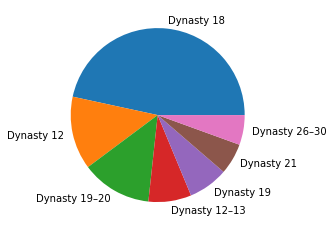

In [ ]:
df[df['Dynasty'].notna()]['Dynasty'].value_counts()[:7].plot(kind='pie', ylabel='')

(4) What kind of weapons would a night guard watch out for (come Night at the Museum)?

<AxesSubplot:title={'center':'Arms and Armor: Common Object Types'}>

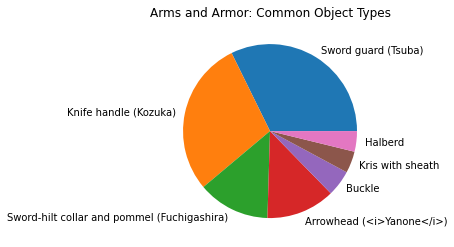

In [ ]:
df[df["Department"] == "Arms and Armor"]["Object Name"].value_counts()[:7]  \
.plot(kind='pie', title="Arms and Armor: Common Object Types", ylabel='')

The Arms and Armory section of the Met is filled with a wonderful assortment of weapons and containers, including:  
(1) Tsuba (1218) - Sword gaurds to protect hand from sliding on blade  
(2) Kozuka (1088) - Japanese Knife holder  
(3) Fuchigashira (506) - Japanese Metal fitting on Sword  
(6) Kris with Sheath (152) - Indonesian assymetrical Dagger  
(7) Halberd (152) - Medieval two-handed pole weapon, consisting of axe blade and spike on long shaft  

(5) What are the current overarching values of the medium / culture / artist nationalities?

<AxesSubplot:title={'center':'Counts of Top 15 Represented Mediums'}, ylabel='Medium'>

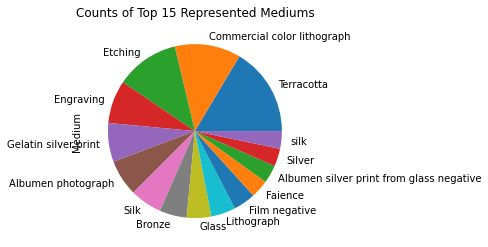

In [ ]:
top_15_mediums = df["Medium"].value_counts()[:15]
top_15_mediums.plot(kind="pie", title="Current Counts of Top 15 Represented Mediums")

<AxesSubplot:title={'center':'Counts of Top 10 Represented Cultures'}>

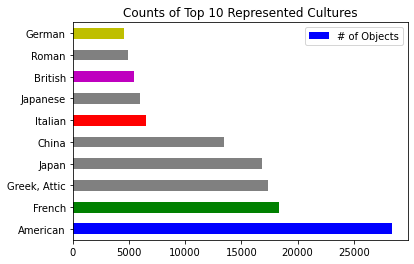

In [ ]:
top_10_culture = df["Culture"].value_counts()[:10]
top_10_culture.plot(kind="barh", legend=True, label="# of Objects", title="Current Counts of Top 10 Represented Cultures", \
                   color=["b", "g", "gray", "gray", "gray", "r", "gray", "m", "gray", "y"])

<AxesSubplot:title={'center':'Counts of Top 5 Represented Artist Nationalities'}>

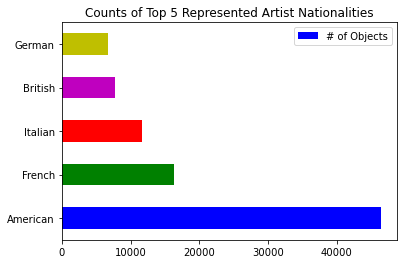

In [ ]:
top_5_nationalities = df["Artist Nationality"].value_counts()[1:8]
top_5_nationalities = top_5_nationalities.drop(labels=[" | ", "French|French"]) 
top_5_nationalities.plot(kind="barh", legend=True, label="# of Objects", title="Current Counts of Top 5 Represented Artist Nationalities", \
                         color=["b", "g", "r", "m", "y"])

##### We could continue breaking apart the dataset as such, but given the scope of the data we would like to address some larger questions over time. 

##### Seeing as there are several columns which will not be relevant to our large-scale analysis, we can drop those values.

In [ ]:
df = df.drop(columns=['Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix','Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist ULAN URL',
       'Artist Wikidata URL', 'City', 'State', 'County', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Rights and Reproduction', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL', 'Period', 'Artist Gender', 'Geography Type', 'Country'])

**Important Note**  
Columns with signficant missing values we are using:    
>|    Column    |  Null-Values(%) |  
>|    ------    | --------------- |  
>|    Culture   |.56|  
>|    Country   |.84|  
>|  Artist (info) |.42|  

## The Main Questions -- Adding complexity with visualizations over time 

### Question 1: The Journey To Two Million
##### What was the overall trend and the outliers in the journey over the years in amassing 2 million objects?

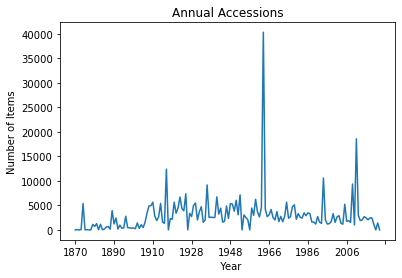

In [ ]:
ax1 = df[df['AccessionYear'] != '2005-02-15'].groupby("AccessionYear")["Object Name"].count().plot(title="Annual Accessions",xlabel="   Year ",ylabel="Number of Items")

#### Outliers
In the Timeseries above, there are several noticeable spikes, the most conspicuous being 1963, with over 40,000 objects being acquired. Let's investigate these outliers:

|    Year    |  Number of Acquisitions |  
|    ------    | :----------: |  
|  1963  | 40333   |  
|  2011   |  18583 |  
|  2009  | 9362   |  

**2009 - The Costume Institute**, one of the smaller departments of the Met, received a massive amount of fashionable clothing from the Brooklyn Museum, nearly 8000 items which dramatically expanded their already large collection. The Met's 4 most acquired items in 2009 were Evening Dresses (557), Hats (388), Dresses (386), and Ensemble (227)

**1963 - The Department of Drawings** separated from the much larger Painting Department two years prior to this spike; perhaps the massive acquisition this year is related to "Drawings" acquistion group receiving it's own department for purchases. Greater than 95% of accessions of the Met in 1963 were Prints and Drawings, a whopping 38,000+ prints added to the Met's collection impressive collection . 

**2011 - Department of Greek and Roman Art** acquired 10,000 Kylix fragments, Kylix being the common type of wine-drinking cup in Anceint Greece, typically with a shallow body, and two horizonal. Greater than 95% of accession of the Met in 2011 were kyklix, amphora, or krater fragments belonging to department of Greek and Roman Art.

### Question 2: 
##### Precisely how did these differing mediums, cultures, and artist nationalities accumulate over time?
Using cumulative sums, we can see when exactly were the formative years of the different mediums, cultures, and artist nationalities.

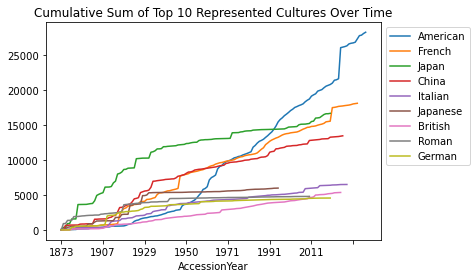

In [ ]:
cultures = top_10_culture.keys().tolist()
for culture in cultures:
    tmpdf = df[df["Culture"] == culture]
    tmpdf.groupby("AccessionYear").count()["Object Number"].cumsum().plot(legend=True, label=culture, title="Cumulative Sum of Top 10 Represented Cultures Over Time").legend(bbox_to_anchor=(1,1))

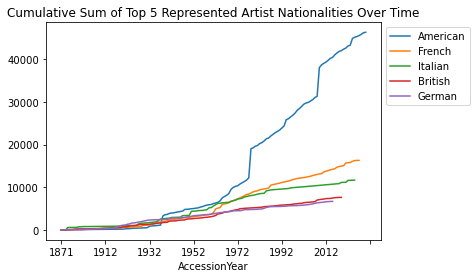

In [ ]:
nationalities = top_5_nationalities.keys().tolist()
for nationality in nationalities:
    tmpdf = df[df["Artist Nationality"] == nationality]
    tmpdf.groupby("AccessionYear").count()["Object Number"].cumsum().plot(legend=True, label=nationality, title="Cumulative Sum of Top 5 Represented Artist Nationalities Over Time").legend(bbox_to_anchor=(1,1))

##### While this data gives us the general trends, it is quite disproportionate -- can we do better?

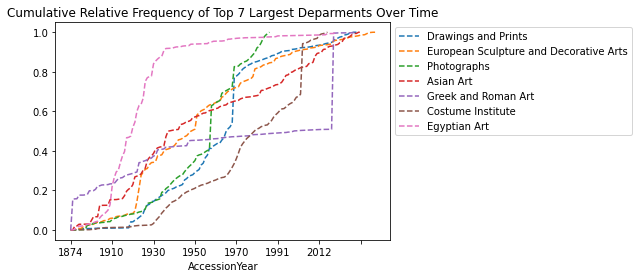

In [ ]:
top_7_departments = df["Department"].value_counts()[:7]
departments = top_7_departments.keys().tolist()
for department in departments:
    tmpdf = df[df["Department"] == department]
    ax2 = (tmpdf.groupby("AccessionYear").count()["Object Number"].cumsum() / tmpdf.groupby("AccessionYear").count()["Object Number"].sum()) \
    .plot(style='--', legend=True, label=department, title="Cumulative Relative Frequency of Top 7 Largest Deparments Over Time").legend(bbox_to_anchor=(1,1))

By making this a cumulative relative frequency plot, the trends for each department become much clearer over time and we can extrapolate the most formative years for each department. The same goes for mediums:

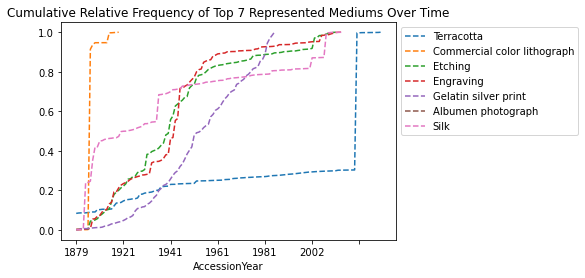

In [ ]:
mediums = top_15_mediums.keys()[:7].tolist()
for medium in mediums:
    tmpdf = df[df["Medium"] == medium]
    ax3 = (tmpdf.groupby("AccessionYear").count()["Object Number"].cumsum() / tmpdf.groupby("AccessionYear").count()["Object Number"] \
    .sum()).plot(style='--', legend=True, label=medium, title="Cumulative Relative Frequency of Top 7 Represented Mediums Over Time") \
    .legend(bbox_to_anchor=(1,1))

### Question 3: 
##### How do the object date vary across departments?

In [ ]:
df_tmp = df.groupby("Department").count()
df_tmp1 = df.groupby("Department").sum()
df_tmp1["Average begin date"] = df_tmp1["Object Begin Date"] / df_tmp["Object Number"]
df_tmp1["Average end date"] = df_tmp1["Object End Date"] / df_tmp["Object Number"]
df_tmp1["Average Object Date"] = (df_tmp1["Average begin date"] + df_tmp1["Average end date"]) / 2

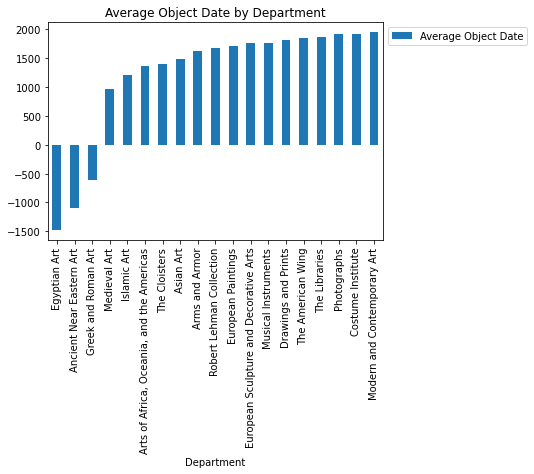

In [ ]:
ax4 = df_tmp1["Average Object Date"].sort_values().plot(kind="bar", title="Average Object Date by Department") \
    .legend(bbox_to_anchor=(1,1))

### Saving Our Graphs

In [ ]:
import matplotlib.pyplot as plt
plt.tight_layout()

ax1.figure.savefig('1Annual_Accessions.pdf', format="pdf")
ax2.figure.savefig('2CMF_7-Largest-Deparments-Over-Time.pdf', format="pdf")
ax3.figure.savefig('3CMF_7-Largest-Mediums-Over-Time.pdf', format="pdf")
ax4.figure.savefig('4Average_Object-Date-by-Department.pdf', format="pdf")


<Figure size 432x288 with 0 Axes>

### (Aside)The Search for the Dutch Printmakers

##### What happened to the Dutch printmakers?

In [ ]:
df_print = df[df["Object Name"] == "Print"]
df_print.groupby("Culture").count().sort_values(by="Object Number", ascending=False).head(5)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
Culture,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Japan,3175,3175,3175,3175,3175,3,3175,3103,3175,1093,2998,0,0,0,3170,3170,3170,3170,3170,3170,3170,3170,3170,3170,36,2987,2947,2763,3175,3175,3173,3173,3174,0,0,0,0,0,0,0,0,0,0,0,3175,2,3175,172,0,3175,3105,3105,3105
China,503,503,503,503,503,1,503,502,503,159,457,0,0,0,273,273,273,273,273,273,273,273,273,273,23,66,69,273,503,503,503,503,503,0,0,0,0,0,0,0,0,0,0,0,503,0,503,0,0,503,183,183,183
India,19,19,19,19,19,0,19,19,19,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,0,0,0,19,19,19,19,19,19,0,0,0,0,0,0,0,0,0,0,0,19,0,19,0,0,19,15,15,15
American,6,6,6,6,6,2,6,6,6,6,0,0,0,0,2,2,2,2,2,2,2,2,2,2,0,1,1,6,6,6,6,6,6,4,4,0,0,4,0,0,0,0,0,0,0,0,6,1,0,6,5,5,5
"India, West Bengal, Calcutta",5,5,5,5,5,0,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,5,0,5,0,0,5,0,0,0


In [ ]:
percent_data = (df_print.count() / len(df_print))["Culture"] * 100
print(f"Only {percent_data:.1f}% recorded cultural values for prints.")

Only 3.8% recorded cultural values for prints.


##### Unfortunately, the major missing value for cultural imputs was actually the also the largest section of "Object Name" -- prints. This serves as reminder of how the abscences of data can signficantly impact its portrayal. Luckily, there is another section of the data we can use:

In [ ]:
df_print.groupby("Artist Nationality").count().sort_values(by="Object Number", ascending=False).head(14)
df_print[df["Artist Nationality"] == "Dutch"]

C:\Users\isaia\AppData\Local\Temp/ipykernel_27408/2478678297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_print[df["Artist Nationality"] == "Dutch"]


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
203164,1981.1197.2,False,False,False,334366,NaN,Drawings and Prints,1981,Print,Hurdy-Gurdy Player with his Dancing Dog,NaN,NaN,NaN,NaN,NaN,16386,Artist,,Cornelis Dusart,"Dutch, Haarlem 1660–1704 Haarlem",,"Dusart, Cornelis",Dutch,1660,1704,NaN,http://vocab.getty.edu/page/ulan/500002441,https://www.wikidata.org/wiki/Q1133546,1685,1685,1685,Etching,Sheet: 86 7/8 x 7 3/8 in. (220.7 x 18.8cm)\r\n...,"The Elisha Whittelsey Collection, The Elisha W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203388,1993.1070.2,False,False,False,334592,NaN,Drawings and Prints,1993,Print,Mocking of Christ,NaN,NaN,NaN,NaN,NaN,6920,Artist,After,Werner van den Valckert,"Dutch, The Hague, 1580/85–1627 Amsterdam",,"Valckert, Werner van den",Dutch,1580,1627,NaN,http://vocab.getty.edu/page/ulan/500015092,https://www.wikidata.org/wiki/Q7983530,ca. 1620,1600,1625,Woodcut; three blocks printed on three sheets,Sheet: 18 5/8 x 34 9/16 in. (47.3 x 87.8cm),"The Elisha Whittelsey Collection, The Elisha W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203398,1993.1112,False,False,False,334602,NaN,Drawings and Prints,1993,Print,Title page to: Tweede Reizen van den Heese De ...,NaN,NaN,NaN,NaN,NaN,6910,Artist,,Jan Luyken,"Dutch, Amsterdam 1649–1712 Amsterdam",,"Luyken, Jan",Dutch,1649,1712,NaN,http://vocab.getty.edu/page/ulan/500000444,https://www.wikidata.org/wiki/Q87466,1660–1712,1660,1712,Etching,Sheet: 7 3/16 x 5 1/2 in. (18.21 x 14cm),"Museum accession, 1993",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203404,1994.17,False,False,False,334608,NaN,Drawings and Prints,1994,Print,The Storm,NaN,NaN,NaN,NaN,NaN,16258,Artist,,Moses van Uyttenbroeck,"Dutch, The Hague ca. 1595–after 1646 The Hague",,"Uyttenbroeck, Moses van",Dutch,1595,1646,NaN,http://vocab.getty.edu/page/ulan/500017388,https://www.wikidata.org/wiki/Q988828,1600–1650,1600,1650,Etching,Sheet: 7 1/2 x 10 3/16 in. (19 x 25.8cm),"The Elisha Whittelsey Collection, The Elisha W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203423,1994.110.1,False,False,True,334627,NaN,Drawings and Prints,1994,Print,St. Jerome Reading,NaN,NaN,NaN,NaN,NaN,16229,Artist,,Rembrandt (Rembrandt van Rijn),"Dutch, Leiden 1606–1669 Amsterdam",,Rembrandt (Rembrandt van Rijn),Dutch,1606,1669,NaN,http://vocab.getty.edu/page/ulan/500011051,https://www.wikidata.org/wiki/Q5598,1634,1634,1634,Etching,Sheet: 4 5/16 x 3 9/16 in. (11 x 9.1cm)\r\nPla...,"Gift of Marietta Morchand, 1994",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Reading|Trees|Saint Jerome|Lions,http://vocab.getty.edu/page/aat/300248178|http...,https://www.wikidata.org/wiki/Q199657|https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

##### And there we have it! Now we're off to enjoy looking at some of the prints. . . 